# Testing Sentiment Analysis
-----

In this notebook, we test sentiment analysis techniques for analysing natural language for which there are three experiments.

As representations of conflict narratives, we curated a dataset comprising Hitler’s “Mein Kampf” along with political speeches from George Bush and Osama bin Laden during the “War on Terror”. In how he advocated for non-violence, Martin Luther King provides control data. 
We do not suggest any moral equivalence between each of these orators. Instead, we are exploring functional equivalence in the use of language to legitimise violence. Each has successfully brought about dramatic change through force, or in the case of Luther King, no-violent means.
Against this dataset, We tested three sentiment analysis API for this experiment. The first is TextBlob, a general-purpose and open-source NLP python library. As state-of-the-art technologies, and therefore more technically sophisticated, the next two are APIs from Google and Watson.
Having such extremes in the dataset means we can assess experimental results through observation since the moral colour each text is accepted, and we know who each were, or were not, seeking to legitimise violence against.

We will now see how quantitative representations of language can distort meaning. Where stark results would be expected from a dataset of extremes, our tests show that regardless of technical sophistication, these technologies are unable to distinguish abusive from non-abusive texts.

In the first experiment, we compare different document scores for each text.

In the second experiment, we compare scores for named entities identified in each document.

More experiments results to follow.

## Load the Sentiment Analysis Dataset and Show Metadata

In [1]:
import os
from cndobjects import SentimentData
apis = ["textblob", "watson", "google"]
filename = "sentiment_analytics"
filepath = os.getcwd()
            
sentiment_analytics = SentimentData(apis = apis,
                                   filename = filename,
                                   filepath = filepath)

sentiment_analytics.fromDisk()
sentiment_analytics.df

loading: sentiment_analytics from:
C:\Users\Steve\OneDrive - University of Southampton\CNDPipeline\Quantitative Analysis


,ref,datestamp,title,word count,sentence count,textblob,watson,google
0,hitler,2020-06-30,Mein Kampf,706100,4527,0.096408,0.373203,-0.225447
1,bush,2001-09-11,911 Address to the Nation,3482,37,0.093816,0.469524,0.000000
2,bush,2001-09-14,Remarks at the National Day of Prayer & Rememb...,5116,57,0.153784,0.298916,0.000000
3,bush,2001-09-15,First Radio Address following 911,2667,30,0.196519,0.351540,0.000000
4,bush,2001-09-17,"Address at Islamic Center of Washington, D.C.",2695,39,-0.076026,0.333191,0.000000
5,bush,2001-09-20,Address to Joint Session of Congress Following...,17321,186,0.132154,-0.331922,-0.100000
6,bush,2001-10-07,Operation Enduring Freedom in Afghanistan Addr...,5693,57,0.167453,0.386644,0.000000
7,bush,2001-10-11,911 Pentagon Remembrance Address,6673,93,0.061266,-0.331954,-0.100000
8,bush,2001-10-11,Prime Time News Conference on War on Terror,4262,37,0.147233,0.333918,0.000000
9,bush,2001-10-11,Prime Time News Conference Q&A,32002,410,0.118774,0.297858,-0.100000


## Test 1 - Document Sentiment Scores

In this first test we look at how each API scores each text of the dataset overall.

In this test we colate and display document sentiment scores for TextBlob, Watson and Google.

Note - Mein Kampf is too large for the Google API limits, therefore, its score is derived from the mean sentence level sentiment score

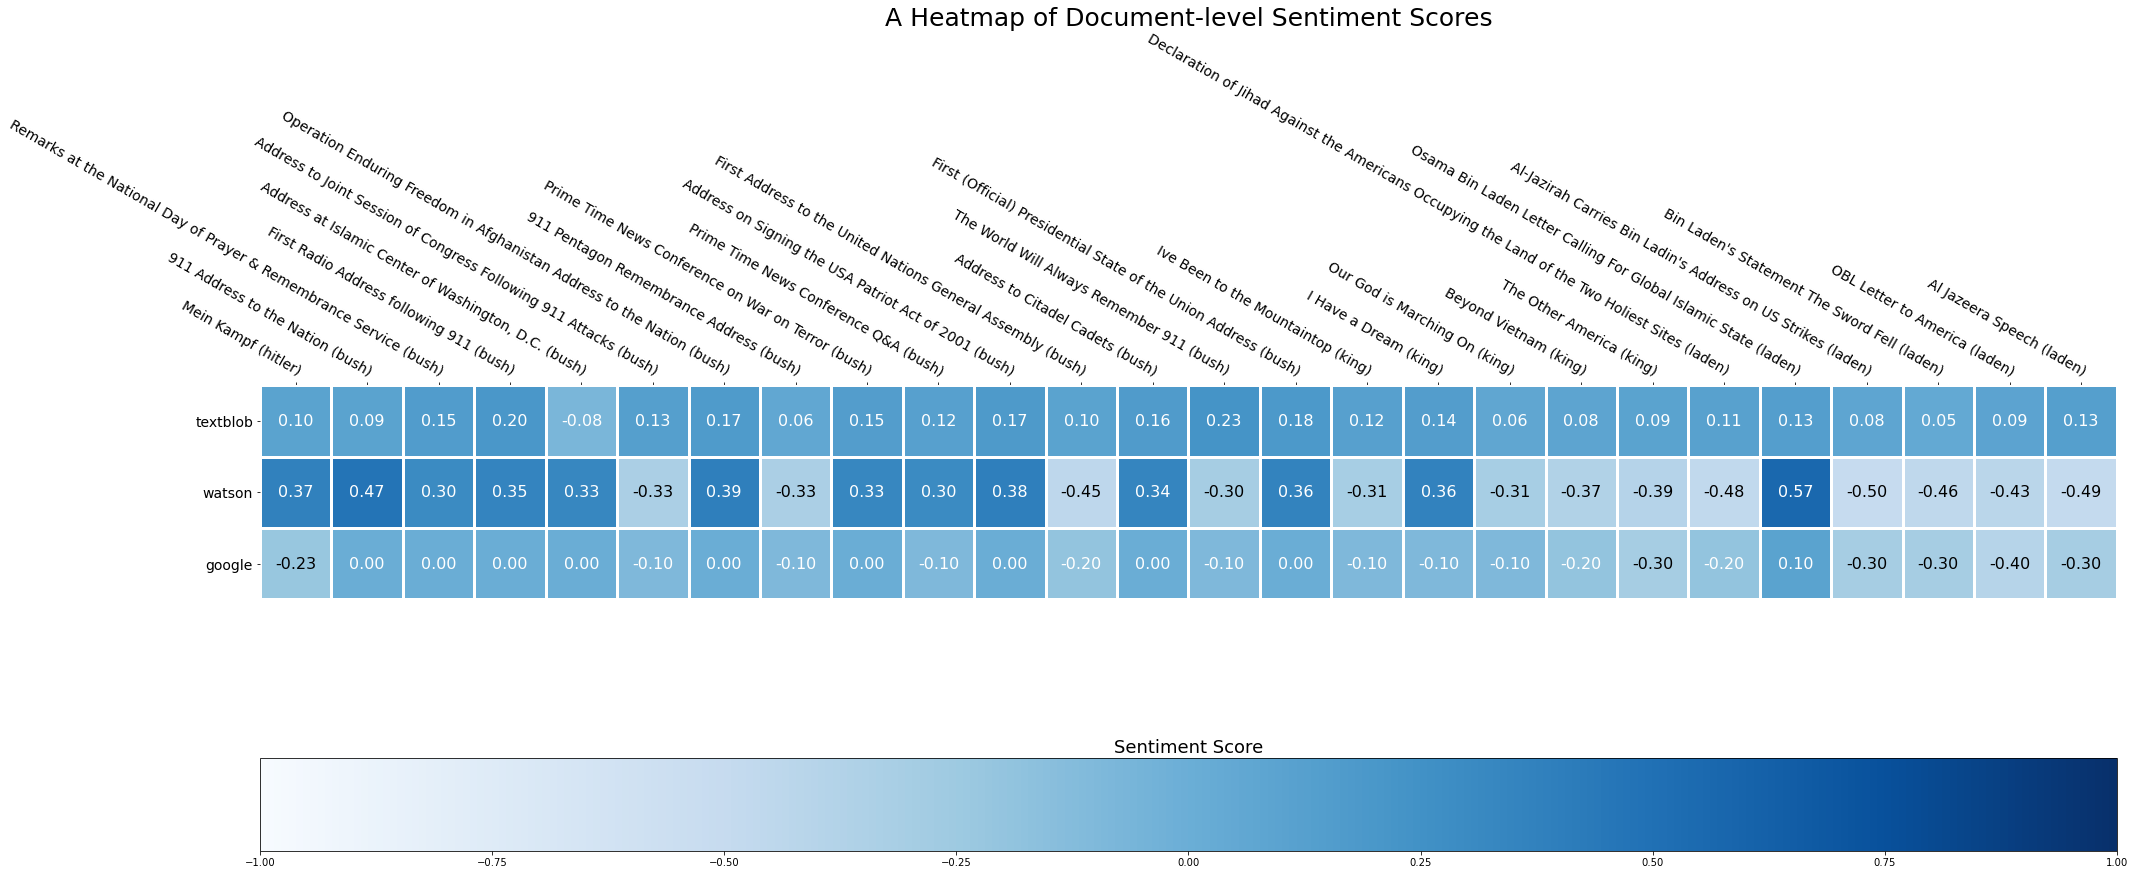

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import cndplots
importlib.reload(cndplots)

fig, ax = plt.subplots(figsize = (30, 15))

scores = np.array([sentiment_analytics.df[api] for api in sentiment_analytics.apis])

im, cbar = cndplots.heatmap(scores,
                    sentiment_analytics.apis,
                    [f'{title} ({ref})' for title, ref in zip(sentiment_analytics.df["title"], sentiment_analytics.df["ref"])], 
                    ax=ax,
                    figtitle = "A Heatmap of Document-level Sentiment Scores",
                    cmap="Blues", cbarlabel="Sentiment Score")

texts = cndplots.annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

### Test 1 - Discussion

Firstly, as a genocidal text, Textblob scores “Mein Kampf” at joint 15th for positivity and 5th highest for Watson. For negativity ranking, Google scores “Mein Kampf” as the sixth most negative. In comparison with the most positive of these texts, TextBlob scores “I Have a Dream” at 0.04 more positive, Watson scores “Mein Kampf” as 0.01 more positive and Google scores “Mein Kampf” at 0.13 more negative. A reasonable expectation would be for “Mein Kampf” to generate scores dramatically more negatively than “I Have a Dream”, which is not the case in these results.

The highest score for TextBlob is Bush’s “The World Will Always Remember 9/11”. The highest score for Watson is bin Laden’s “Letter Calling for Global Islamic State”. The highest score for Google is also bin Laden’s “Letter Calling for Global Islamic State”. In how Luther King advocated for non-violent change, contrary to these results, his texts would be expected to score more highly.

The lowest negativity score for TextBlob is -0.08 for Bush’s “Address at Islamic Center of Washington, D.C.”. The lowest negativity score for Watson is bin Laden’s “Al Jazeera Speech”. The lowest negativity score for Google is bin Laden’s “letter to America”. As a genocidal text, “Mein Kampf” would reasonably be expected to generate the most negative scores.

Across the range of texts, and excluding scores of 0, the only text where all three APIs consistently score for positivity or negativity is bin Laden’s “Letter Calling for Global Islamic State”. For all other texts, there is no agreement between all three APIs for positivity of negativity.

Google, scores nine of Bush’s 14 texts at 0, which suggests neutral sentiment for speeches in which he sought to legitimise the “War on Terror”.

With each API generating contrasting scores, there is simply no way to assess the efficacy of these results. The APIs certainly do not produce results that might be expected. We can only conclude that quantitative expressions of sentiment generate meaningless outputs.

## Test 2 - Testing Sentiment Scores at the Sentence Level

In this next experiment we show the sentiment scores for each sentence of selected documents.

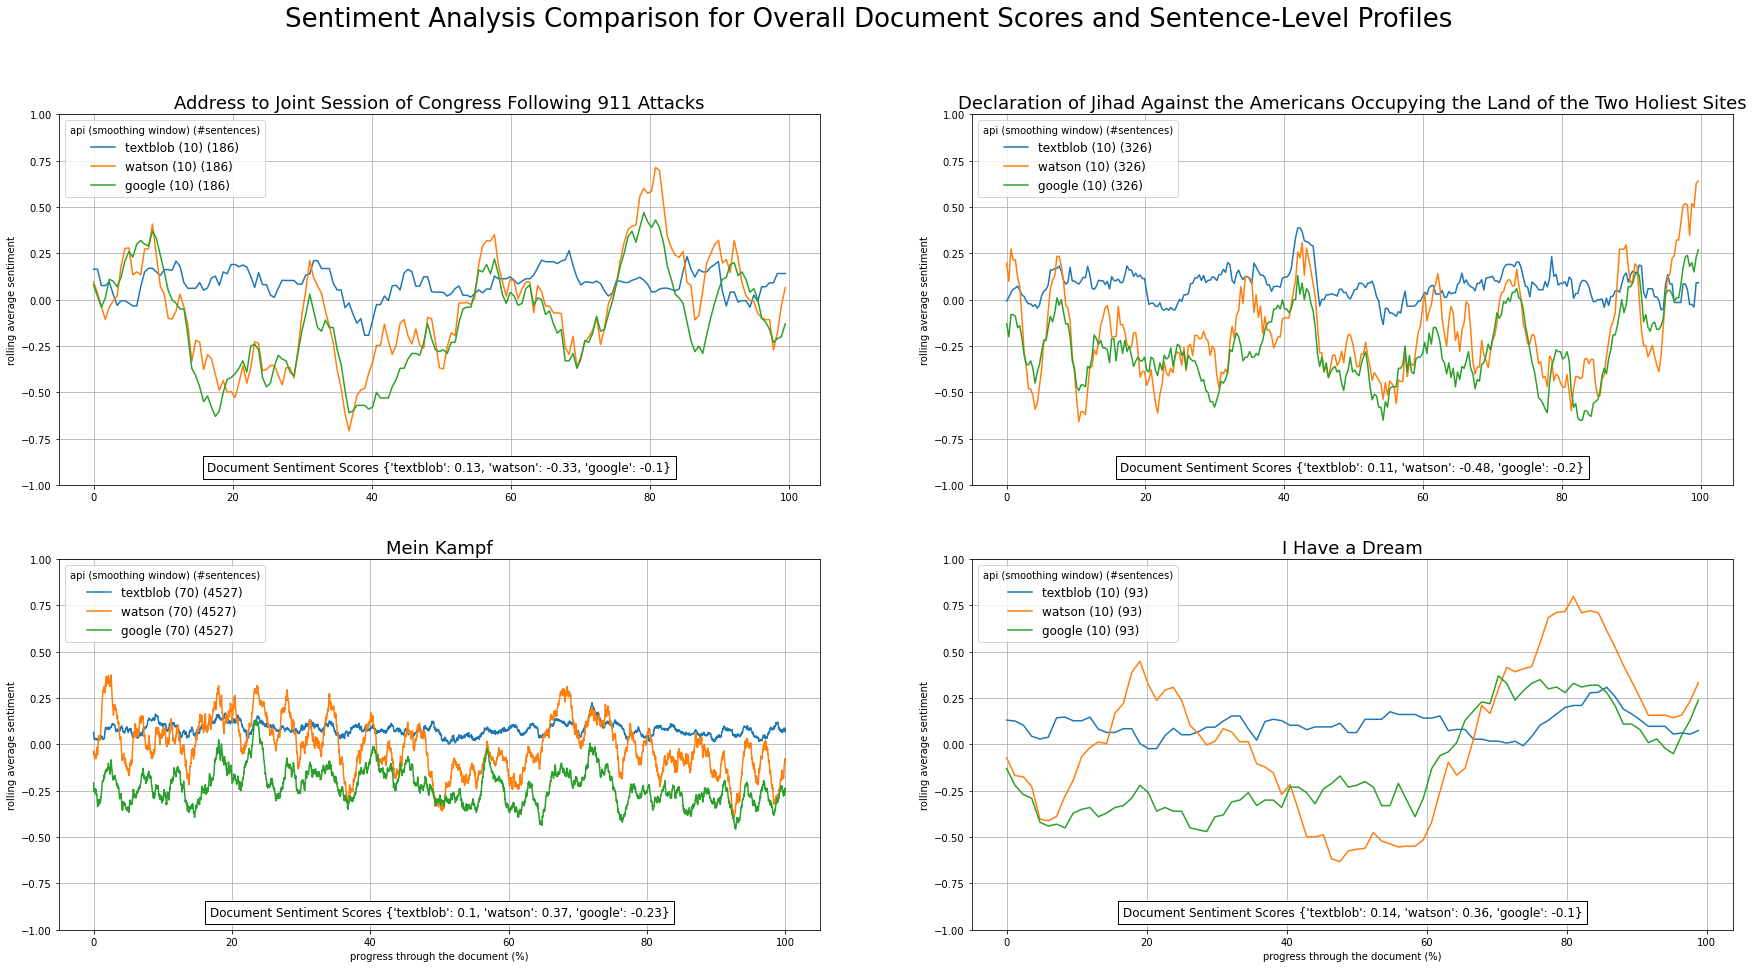

In [3]:
import importlib
import cndplots
importlib.reload(cndplots)

# setup document references
# orator ref // document reference // smoothing window
orators_list = [("bush", 4, 10), ("laden", 0, 10), ("hitler", 0, 70), ("king", 1, 10)]

fig = cndplots.sentiment_plot(orators_list, sentiment_analytics, smooth = True, \
                    figtitle = 'Sentiment Analysis Comparison for Overall Document Scores and Sentence-Level Profiles',
                    xlabel = 'progress through the document (%)',
                    ylabel = 'rolling average sentiment')
fig.savefig(fname = "sentiment_plots")

### Test 2 - Discussion

These four graphs show a sentence level sentiment profiles against each API for significant texts from the dataset.

Firstly consider the profile of both Bush’s and bin Laden’s texts in which they declare war upon each other. Both have similar sentiment profiles relative to positivity and negativity; however, the sentiment relative to how they were received was very different. Their supporters would receive each positively while their opponents would view them negatively. Moreover, transcripts of Bush’s speech show how people applauded statements these APIs scored negativity.

Secondly, in a dataset of extremes, we can see the profile for Mein Kampf is indistinguishable from the rest. We might expect such an extremely harmful body of words to produce more stark results. Notably, if you look at the overall document scores, where Mein Kampf and I Have a Dream are extreme opposites in terms of sentiment, Watson and TextBlob determine both as positive, and Google determines them to be negative. 

In a face-to-face discussion, we might now discuss what these results mean, and inevitably there will be disagreement, yet what is the assessment framework for analysing sentiment that moderates our differences in agreement? Missing from teh y axis of each graph is a unit of measurement for sentiment, so how can we assess what does not have a defined metric? What we might agree upon for now is that for a dataset comprising extremes of sentiment, and APIs of extremes in technical sophistication, these results distort th intended meaning of each text. And perhaps in how these APIs are unable to distinguish Mein Kampf from the others, these results might also be regarded as somewhat troublesome.

## Review of Sentence Scores

Following the findings from the sentence-level sentiment profiles, this next section is a more detailed review of sentence-level scores.

First is a reivew of agreement between each API for sentence scores for which there are three assessments. The first assessment reviews agreement between each of the APIs. If all three APIs score either positively or negatively they are in agreement, if one differs from the others they are in disagrement. The second assessment reviews agreement between general purpose and state-of-the-art. If Watson and Google agree, then there is agreement, otherwise there is disagrement. The third assessment reviews Watson's emotion scores. If an positive emotion correlates with a positive sentiment score there is agreement, otherwise there is disagreements.

Second is a review of the most positive and negative scores from each document. In this review scores of +1 or -1 for any API are extracted from each document, then the highest and lowest score not +1 or -1 are extracted. Through observation, these sentences are then reviewed.

Third is a comparison of selected sentences from "Mein Kampf" and "I Have a Dream". Sentences from Mein Kampf are selected for obvious assertions of racism. The iconic, 'I Have a Dream" statements are selected from "I Have a Dream"

### Agreement between APIs

In [161]:
import pandas as pd

agreement = {1 : {"assessment" : "assess the agreement between APIs", "score" : 0}, 
             2: {"assessment" : "assess the agreement between state-of-the-art APIs", "score" : 0},
             3 : {"assessment" : "assess agreement between Watson emotion and sentiment", "score" : 0}
            }

for orator in sentiment_analytics.values():
    
    for text in orator:
        
        for sentence in text["sentences"]:
            scores = sentence["scores"]
            
            # assessment 1: agreement between each
            # if all the scores are positive or all the scores are negative or all the scores are neutral there is agreement
            if all([i > 0 for i in scores.values()]) or all([i < 0 for i in scores.values()]) or all([i == 0 for i in scores.values()]):
                agreement[1]["score"] +=1
                
            # assessment 2: agreement between each state of the art
            sota = ["watson", "google"]
            # if all the scores are positive or all the scores are negative or all the scores are neutral there is agreement
            if all([i > 0 for k, i in scores.items() if k in sota]) or all([i < 0 for k, i in scores.items() if k in sota]) or all([i == 0 for k, i in scores.items() if k in sota]):
                agreement[2]["score"] +=1
            
            # sadness, joy, fear, disgust, anger
            api = "watson"
            pos_emotion = ["joy"]
            neg_emotion = ["sadness", "fear", "disgust", "anger"]
            watson_score = sentence["scores"]["watson"]
            emotions = sentence["emotion"]
            
            # if sentiment score is positive and the highest scoring emotion is a positive emotion, or if sentiment score is negative and highest scoring emotion is a negative emotion
            if all([watson_score > 0, max(emotions, key=emotions.get) in pos_emotion]) or all([watson_score < 0, max(emotions, key=emotions.get) in neg_emotion]):
                agreement[3]["score"] +=1
            
df = pd.DataFrame(agreement)       
for i, v in enumerate(df.values[1]):
    df.values[1][i] = f'{round(v*100/len(sentiment_analytics))}%'
df.T

,assessment,score
1,assess the agreement between APIs,27%
2,assess the agreement between state-of-the-art APIs,56%
3,assess agreement between Watson emotion and sentiment,52%


These results show that agreement between all three APIs is 42%, while agreement between state-of-the-art APIs is 67%. There is a reasonable amount of disagreement between these APIs, yet what is the assessment framework for sentiment analysis to determine which API is correct?

Within the Watson API, agreement between sentiment and emotion assertion is 52%, this means for 48% of sentences the sentiment and emotion scores are contradictory. 

### Review of highest scoring sentences from each document

In [7]:
import pandas as pd

orator = "hitler"
text = 0
title = f'{orator} ({sentiment_analytics[orator][text]["datestamp"]}) {sentiment_analytics[orator][text]["title"]}'
print(title)
print('-'*len(title))

pd.set_option('max_colwidth', 1000)
for sentdata in sentiment_analytics.minmax[orator][text].values():
    
    if sentdata["sentences"]:
        print(sentdata["explain"])
        
        if isinstance(sentdata["sentences"], list):
            display(pd.DataFrame(sentdata["sentences"]))
        if isinstance(sentdata["sentences"], dict):
            display(pd.DataFrame(sentdata["sentences"]).T)
    

hitler (2020-06-30) Mein Kampf
------------------------------
List of sentences an API has scored at +1


,text,textblob,watson,google,sadness,joy,fear,disgust,anger
0,"Over against all this, the völkisch concept of the world recognizes that the primordial racial elements are of the greatest significance for mankind.",1.0,0.437846,0.2,0.106025,0.557611,0.036044,0.047257,0.013973
1,"What, for instance, could a royal and imperial university professor write about the meaning and purpose of a State in a country whose statal form represented the greatest monstrosity of the twentieth century?",1.0,0.000000,-0.2,0.111665,0.512514,0.166332,0.076076,0.031719
2,"In this way frontier colonies could gradually be founded whose inhabitants would be of the purest racial stock, and hence would possess the best qualities of the race.",1.0,0.674830,0.2,0.104914,0.634831,0.081496,0.083023,0.036657
3,The best defence will not be in the arms it possesses but in its citizens.,1.0,0.781350,0.3,0.018361,0.617290,0.076402,0.025135,0.011030
4,It must take care that the positions of leadership and highest influence are given to the best men.,1.0,0.000000,0.3,0.033583,0.396110,0.084596,0.033232,0.092652
5,I demanded of them that they should come forward if the slightest attempt to sabotage the meeting were made and that they must remember that the best defence is always attack.,1.0,-0.918124,-0.5,0.279899,0.297947,0.258267,0.009457,0.090200
6,And it made a very great impression.,1.0,0.989021,0.9,0.017617,0.826598,0.047486,0.038944,0.014276
7,"At best it has subjects, but not citizens.",1.0,0.649177,-0.5,0.019496,0.774533,0.019395,0.004311,0.023146
8,At that time this appeared a wonderful thing to us.,1.0,0.977048,0.5,0.043803,0.822303,0.075755,0.029180,0.022491
9,The result of this experiment was generally excellent.,1.0,0.902133,0.7,0.032093,0.571236,0.005352,0.028288,0.159061


List of sentences an API has scored at -1


,text,textblob,watson,google,sadness,joy,fear,disgust,anger
0,In its stead we must raise the battle-cry of a courageous and ruthless attack.,-1.0,0.439036,-0.3,0.760689,0.008051,0.274796,0.044328,0.165815
1,It is therefore outrageously unjust to speak of the pre-Christian Germans as barbarians who had no civilization.,-1.0,-0.612795,-0.9,0.138325,0.226338,0.038882,0.131372,0.159853
2,But when it did come our lack of this patriotic passion was avenged in a terrible way.,-1.0,-0.979846,-0.8,0.317474,0.085851,0.233704,0.365778,0.332714
3,"It is a terrible thought, but the fact was so.",-1.0,-0.957761,-0.5,0.580116,0.003496,0.220153,0.309622,0.261043
4,Times of national collapse are determined by the preponderating influence of the worst elements.,-1.0,-0.683736,-0.6,0.639467,0.038043,0.142986,0.214665,0.191753
5,A minority constituted of the worst elements had made the Revolution.,-1.0,-0.682241,-0.7,0.332181,0.129654,0.139314,0.328191,0.306781
6,Therefore after the Revolution the bourgeois parties also capitulated to the street in a miserable fashion.,-1.0,0.000000,-0.7,0.267311,0.535663,0.058854,0.110005,0.112084
7,"In December, 1922, the situation between Germany and France again seemed menacingly exacerbated.",-1.0,0.000000,-0.4,0.484670,0.278861,0.231750,0.030774,0.070594
8,Or has it not been miserable to watch the comic-opera negotiations which since 1918 have always preceded the repeated dictates?,-1.0,-0.875130,-0.3,0.380373,0.162684,0.126475,0.162503,0.166382


Most positive sentence less than +1 for each API


,text,textblob,watson,google,sadness,joy,fear,disgust,anger
textblob,And the ideal of Hellenic culture should be preserved for us in all its marvellous beauty.,0.9,0.99296,0.9,0.079307,0.655893,0.027128,0.038967,0.028239
watson,"We must always bear in mind the fact that, generally speaking, the highest ideals are always the outcome of some profound vital need, just as the most sublime beauty owes its nobility of shape, in the last analysis, to the fact that the most beautiful form is the form that is best suited to the purpose it is meant to serve.",0.385417,0.998358,0.6,0.043426,0.855826,0.010173,0.011097,0.035572
google,"By helping to lift the human being above the level of mere animal existence, Faith really contributes to consolidate and safeguard its own existence.",0.06,0.945416,0.9,0.299814,0.45886,0.10968,0.165757,0.027626


Most negative sentence greater than -1 for each API


,text,textblob,watson,google,sadness,joy,fear,disgust,anger
watson,"But when the disgraceful collapse occurred and the crushing, disgraceful capitulation followed, the sacrifice of billions of marks and thousands of young Germans-who had been stupid enough to take the promises of the Reich's leaders seriously- indignation flared into a blaze against such a betrayal of our unfortunate people.",-0.161905,-0.999782,-0.9,0.231753,0.009378,0.089248,0.512867,0.536426
google,Once we understand the impenetrable stupidity of our public we cannot be surprised that such tactics turn out successful.,0.05,-0.755798,-0.9,0.218589,0.243519,0.039148,0.173192,0.458885
textblob,"When men have to struggle with death every day and remain for weeks in trenches of mire, often very badly supplied with food, the man who is unsure of himself and begins to waver cannot be made to stick to his post by threats of imprisonment or even penal servitude.",-0.91,-0.982836,-0.8,0.550721,0.008903,0.457371,0.125074,0.223711


### Comparison of selected sentences from Mein Kampf and I Have a Dream

In [4]:
import pandas as pd
from collections import Counter
import seaborn as sns

racism_texts = [(238, "A change would be possible only by a mixture of blood, but in this case the quality of the superior race would be debased."),
                (240, "It is especially the cultural creativeness which disappears when a superior race intermixes with an inferior one, even though the resultant mongrel race should excel a thousandfold in speaking the language of the race that once had been superior."),
                (326, "Thus, conversely, a State may be called bad if, in spite of the existence of a high cultural level, it dooms to destruction the bearers of that culture by breaking up their racial uniformity."),
                (389, "Nature generally takes certain measures to correct the effect which racial mixture produces in life."),
                (394, "At all critical moments in which a person of pure racial blood makes correct decisions, that is to say, decisions that are coherent and uniform, the person of mixed blood will become confused and take measures that are incoherent."),
                (837, "No boy or girl must leave school without having attained a clear insight into the meaning of racial purity and the importance of maintaining the racial blood unadulterated."),
                (1133, "The constructive principle of Aryan humanity is thus displaced by the destructive principle of the Jews, They become the 'ferment of decomposition' among nations and races and, in a broad sense, the wreckers of human civilization."),
                (1855, "And the swastika signified the mission allotted to us – the struggle for the victory of Aryan mankind and at the same time the triumph of the ideal of creative work which is in itself and always will be anti-Semitic."),
                (4525, "A state which in this age of racial poisoning dedicates itself to the care of its best racial ele­ments must some day become lord of the earth."),
               ]

dream_texts = [(61, "I have a dream that one day this nation will rise up and live out the true meaning of its creed:"),
               (62, "We hold these truths to be self-evident, that all men are created equal."),
               (63, "I have a dream that one day on the red hills of Georgia, the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood."),
               (64, "I have a dream that one day even the state of Mississippi, a state sweltering with the heat of injustice, sweltering with the heat of oppression, will be transformed into an oasis of freedom and justice."),
               (65, "I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character."),
               (66, "I have a dream today!"),
               (67, "I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of \"interposition\" and \"nullification\" -- one day right there in Alabama little black boys and black girls will be able to join hands with little white boys and white girls as sisters and brothers."),
               (68, "have a dream today!"),
               (69, "I have a dream that one day every valley shall be exalted, and every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight; \"and the glory of the Lord shall be revealed and all flesh shall see it together.\"")
              ]

# for orator in sentiment_analytics.values():
#     for text in orator:
#         for i, sentence in enumerate(text["sentences"]):
#             if "race" in sentence["text"].split(" "):
#                 print(i, '=>', sentence["text"])

# tuple key to access each set of selected sentences
hitler = ("hitler", 0, racism_texts)
king = ("king", 1, dream_texts)

# function to colour sentiments based on positivity or negativity
def color_red_or_green(val):
    if isinstance(val, (int, float)):
        color = 'red' if val < 0 else 'green'
        return 'color: %s' % color
    return val
    
# function to get the formatted sentiment and emotion scores
def get_sents(orator, text, sents):
    for n in sents:
        sent = sentiment_analytics[orator][text]["sentences"][n[0]]
        sent_scores = dict()
        sent_scores["text"] = sent["text"]
        sent_scores.update(sent["scores"])
        sent_scores.update(sent["emotion"])
        yield sent_scores
        

# create the dataframe of selected sentences with sentiment and emotion scores
pd.set_option('max_colwidth', 1000)        
df = pd.DataFrame(get_sents(*hitler))

# add an empty row for adding analysis data
df = df.append(pd.Series(dtype=str), ignore_index=True).fillna('')

# review sentiment scores to determine prevalence of positivity/negativity
for col in df[sentiment_analytics.apis]:
    pos = [i > 0 for i in df[col] if i != ''].count(True)
    neg = [i < 0 for i in df[col] if i != ''].count(True)
    neu = [i == 0 for i in df[col] if i != ''].count(True)
        
    df[col][df.index[-1]] = (f'positive = {pos} negative = {neg} neutral = {neu}')
        
# review emotion scores to determine prevalence of expressed emotions in the sentences        
ranking  = {"first" : "", "second" : "", "third" : ""}
emotions = ["sadness", "joy", "fear", "disgust", "anger"]
for rank in ranking:
    
    cache = list()
    
    # iterate through the column slice containing emotions
    for index, row in df[emotions].iterrows():

        # exclude just added new_row row
        if not any(row.values):
            continue

        # remove the previous ranked emotions from consideration
        temp = row
        for v in list(ranking.values()):
            if v in temp: temp = temp.drop(v)

        # sort the emotion scores in descending order to get 
        # top emotion minus previously ranked emotion
        sorted_row = temp.sort_values(ascending = False)
        cache.append(temp.loc[lambda x: x == sorted_row[0]].keys()[0])

    # add top ranking score to ranking dictionary
    # add ranking to dataframe
    emotion = Counter(cache).most_common()[0][0]
    ranking[rank] = emotion
    df[emotion][len(df) -1] = rank

# display dataframe
# used to capture subset slice of df for gradient for rows with mixture on string and index
u = df.index.get_level_values(0)
cm = sns.light_palette("green", as_cmap=True)
display(df.style.applymap(color_red_or_green, subset = sentiment_analytics.apis).\
                  background_gradient(cmap=cm, subset = pd.IndexSlice[u[:-1], emotions]
                                     ))

,text,textblob,watson,google,sadness,joy,fear,disgust,anger
0,"A change would be possible only by a mixture of blood, but in this case the quality of the superior race would be debased.",0.233333,0.710034,0.100000,0.239697,0.091257,0.265369,0.180076,0.225689
1,"It is especially the cultural creativeness which disappears when a superior race intermixes with an inferior one, even though the resultant mongrel race should excel a thousandfold in speaking the language of the race that once had been superior.",0.375000,-0.903689,-0.200000,0.290791,0.282847,0.192187,0.134549,0.140157
2,"Thus, conversely, a State may be called bad if, in spite of the existence of a high cultural level, it dooms to destruction the bearers of that culture by breaking up their racial uniformity.",-0.146667,0.000000,-0.700000,0.478089,0.004917,0.398852,0.098106,0.367820
3,Nature generally takes certain measures to correct the effect which racial mixture produces in life.,0.132143,0.000000,0.100000,0.060799,0.327398,0.015869,0.066278,0.038419
4,"At all critical moments in which a person of pure racial blood makes correct decisions, that is to say, decisions that are coherent and uniform, the person of mixed blood will become confused and take measures that are incoherent.",0.019048,-0.977554,-0.200000,0.511681,0.098692,0.318454,0.078687,0.256734
5,No boy or girl must leave school without having attained a clear insight into the meaning of racial purity and the importance of maintaining the racial blood unadulterated.,0.250000,0.817337,-0.300000,0.141870,0.113044,0.125909,0.178443,0.120350
6,"The constructive principle of Aryan humanity is thus displaced by the destructive principle of the Jews, They become the 'ferment of decomposition' among nations and races and, in a broad sense, the wreckers of human civilization.",-0.179167,0.000000,-0.500000,0.298286,0.192309,0.182965,0.216439,0.197567
7,And the swastika signified the mission allotted to us – the struggle for the victory of Aryan mankind and at the same time the triumph of the ideal of creative work which is in itself and always will be anti-Semitic.,0.466667,0.000000,0.300000,0.441992,0.411391,0.031020,0.076359,0.087456
8,A state which in this age of racial poisoning dedicates itself to the care of its best racial elements must some day become lord of the earth.,1.000000,-0.332701,-0.200000,0.223206,0.449538,0.066611,0.091908,0.097152
9,,positive = 7 negative = 2 neutral = 0,positive = 2 negative = 3 neutral = 4,positive = 3 negative = 6 neutral = 0,first,second,third,,
